In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

## Combining files from trip

In [4]:
from glob import glob
files = glob('./Soc_estimation_data/TripA*')
files

['./Soc_estimation_data\\TripA01.csv',
 './Soc_estimation_data\\TripA02.csv',
 './Soc_estimation_data\\TripA03.csv',
 './Soc_estimation_data\\TripA04.csv',
 './Soc_estimation_data\\TripA05.csv',
 './Soc_estimation_data\\TripA06.csv',
 './Soc_estimation_data\\TripA07.csv',
 './Soc_estimation_data\\TripA08.csv',
 './Soc_estimation_data\\TripA09.csv',
 './Soc_estimation_data\\TripA10.csv',
 './Soc_estimation_data\\TripA11.csv',
 './Soc_estimation_data\\TripA12.csv',
 './Soc_estimation_data\\TripA13.csv',
 './Soc_estimation_data\\TripA14.csv',
 './Soc_estimation_data\\TripA15.csv',
 './Soc_estimation_data\\TripA16.csv',
 './Soc_estimation_data\\TripA17.csv',
 './Soc_estimation_data\\TripA18.csv',
 './Soc_estimation_data\\TripA19.csv',
 './Soc_estimation_data\\TripA20.csv',
 './Soc_estimation_data\\TripA21.csv',
 './Soc_estimation_data\\TripA22.csv',
 './Soc_estimation_data\\TripA23.csv',
 './Soc_estimation_data\\TripA24.csv',
 './Soc_estimation_data\\TripA25.csv',
 './Soc_estimation_data\\

In [4]:
df_A= pd.concat([pd.read_csv(file,encoding='unicode_escape') for file in files],ignore_index= True)
df_A.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],Unnamed: 23
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,1,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,NaN
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,1,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,NaN
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,1,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,NaN
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,1,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,NaN
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,1,0.0,0.0,25.5,0.0,0.0,0.0,30.5,24.5,NaN


### Calculating average voltage

In [5]:
df_A['average_voltage'] = df_A['Battery Voltage [V]'].expanding().mean()
df_A[['Battery Voltage [V]','average_voltage']]

,Battery Voltage [V],average_voltage
0,391.4,391.400000
1,391.4,391.400000
2,391.4,391.400000
3,391.4,391.400000
4,391.4,391.400000
...,...,...
467696,376.4,382.859093
467697,376.4,382.859079
467698,376.4,382.859065
467699,376.4,382.859051


### calculating average current

In [6]:
df_A['average_current'] = df_A['Battery Current [A]'].expanding().mean()
df_A[['Battery Current [A]','average_current']]

,Battery Current [A],average_current
0,-2.20,-2.200000
1,-2.21,-2.205000
2,-2.26,-2.223333
3,-2.30,-2.242500
4,-2.30,-2.254000
...,...,...
467696,-2.44,-15.407312
467697,-2.41,-15.407284
467698,-2.46,-15.407256
467699,-2.49,-15.407229


In [9]:
df_A.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]',
       'Unnamed: 23', 'average_voltage', 'average_current'],
      dtype='object')

In [10]:
df_A.dtypes

Time [s]                               float64
Velocity [km/h]                        float64
Elevation [m]                          float64
Throttle [%]                           float64
Motor Torque [Nm]                      float64
Longitudinal Acceleration [m/s^2]      float64
Regenerative Braking Signal            float64
Battery Voltage [V]                    float64
Battery Current [A]                    float64
Battery Temperature [°C]               float64
max. Battery Temperature [°C]          float64
SoC [%]                                float64
displayed SoC [%]                      float64
min. SoC [%]                             int64
max. SoC [%)                           float64
Heating Power CAN [kW]                 float64
Heating Power LIN [W]                  float64
Requested Heating Power [W]            float64
AirCon Power [kW]                      float64
Heater Signal                            int64
Heater Voltage [V]                     float64
Heater Curren

In [11]:
df_A.isnull().sum()

Time [s]                                    0
Velocity [km/h]                             0
Elevation [m]                               0
Throttle [%]                                0
Motor Torque [Nm]                           0
Longitudinal Acceleration [m/s^2]           0
Regenerative Braking Signal                 0
Battery Voltage [V]                         0
Battery Current [A]                         0
Battery Temperature [°C]                    0
max. Battery Temperature [°C]               0
SoC [%]                                     0
displayed SoC [%]                           0
min. SoC [%]                                0
max. SoC [%)                                0
Heating Power CAN [kW]                      0
Heating Power LIN [W]                  310587
Requested Heating Power [W]                 0
AirCon Power [kW]                           0
Heater Signal                               0
Heater Voltage [V]                     310587
Heater Current [A]                

In [12]:
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns

## Exploratory Data Analysis

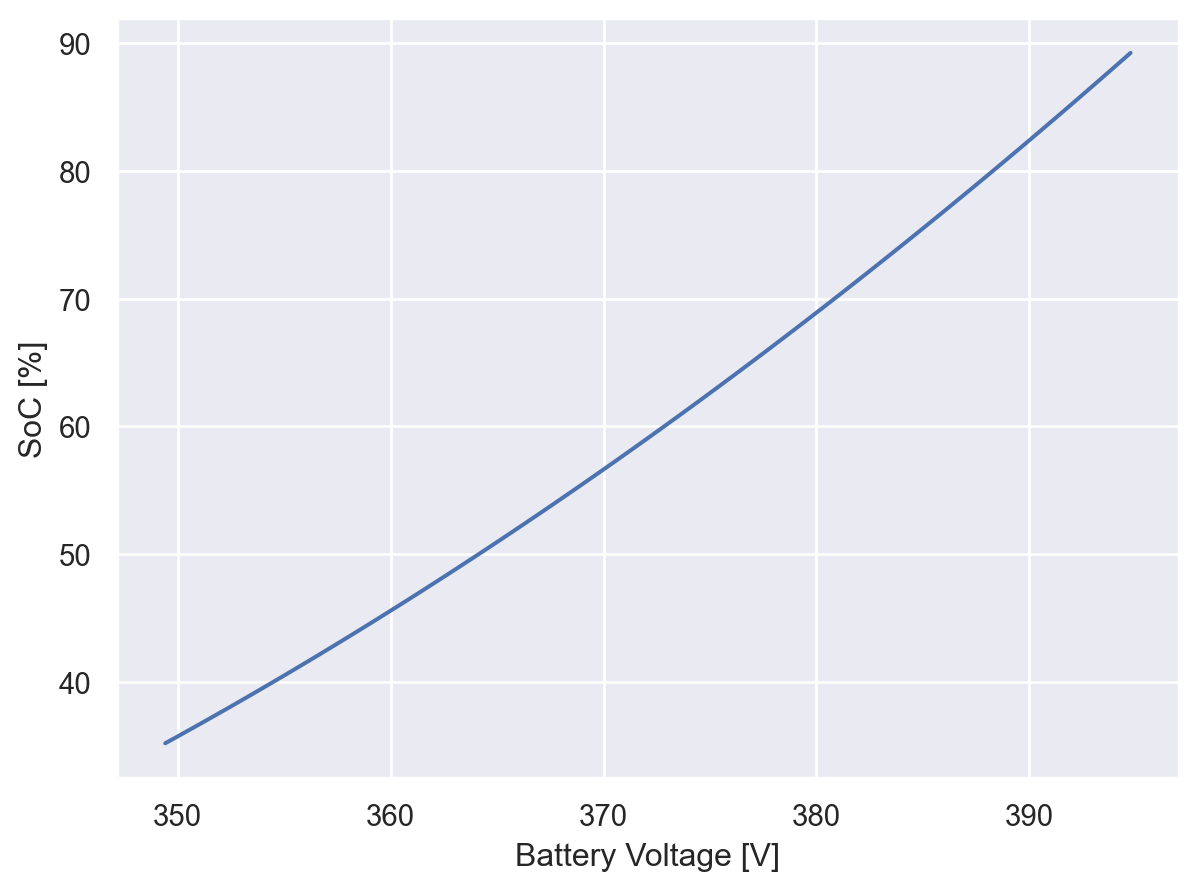

In [13]:


(
 so.Plot(data=df_A,
         x='Battery Voltage [V]',
         y='SoC [%]'
        )
    .add(so.Line(),so.PolyFit(order=2))

)


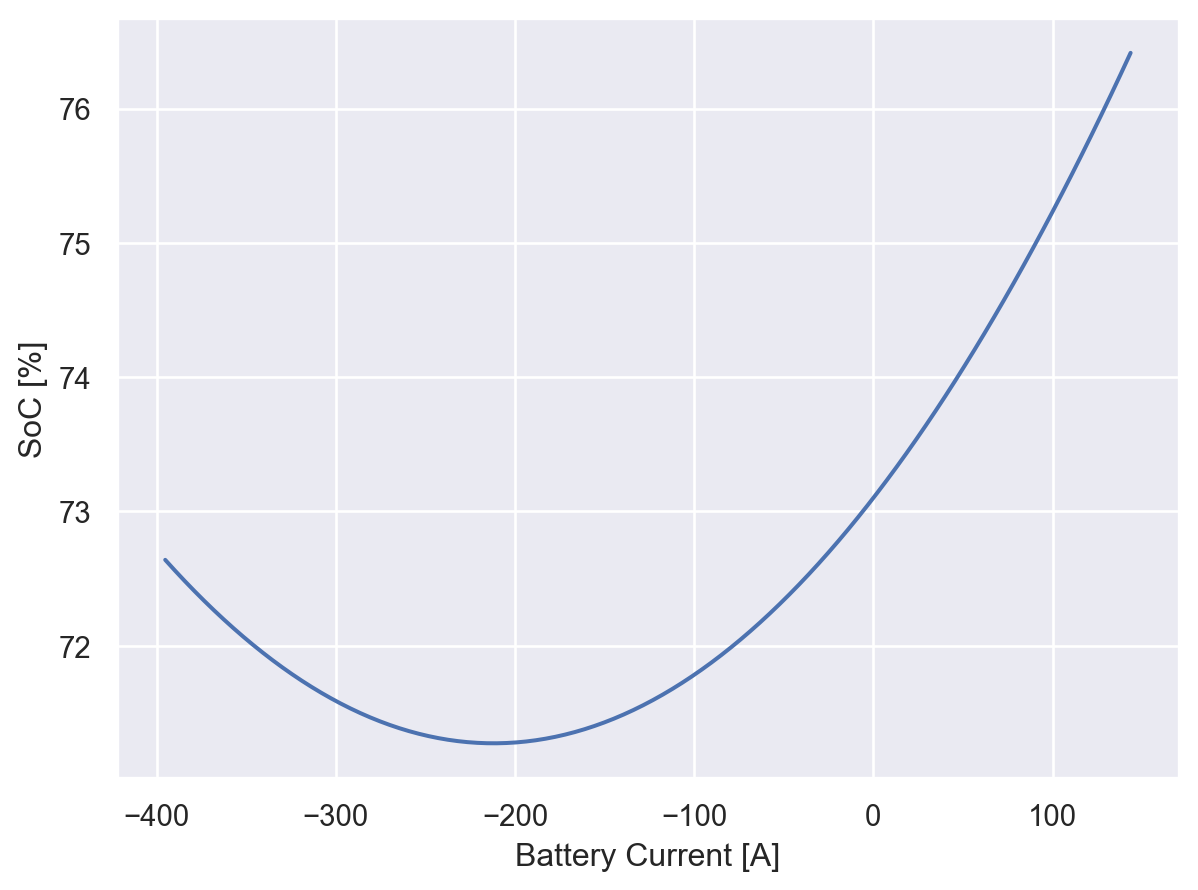

In [14]:

(
 so.Plot(data=df_A,
         x='Battery Current [A]',
         y='SoC [%]'
        )
    .add(so.Line(),so.PolyFit(order=2))

)

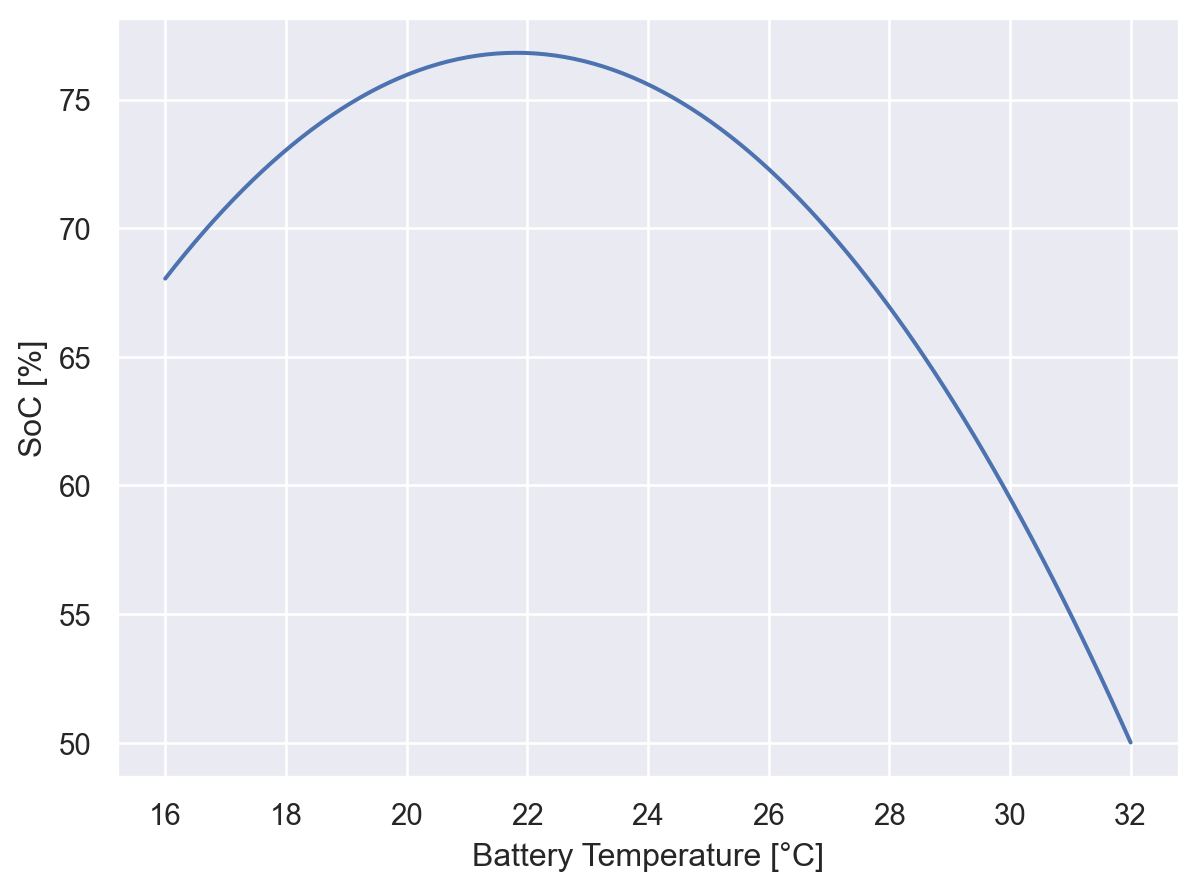

In [15]:
(
 so.Plot(data=df_A,
         x='Battery Temperature [°C]',
         y='SoC [%]'
        )
    .add(so.Line(),so.PolyFit(order=2))

)

## Feature Selection

In [16]:
df_A.corr()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],Unnamed: 23,average_voltage,average_current
Time [s],1.000000,-0.063695,-0.338040,-0.049691,-0.058256,-0.038501,0.029374,-0.234530,0.076225,0.248558,...,-0.183325,0.183521,0.037441,0.186260,0.044797,-0.304270,-0.211034,NaN,-0.141862,-0.145288
Velocity [km/h],-0.063695,1.000000,0.084540,0.550550,0.096419,-0.008654,-0.107719,-0.481722,-0.344240,0.179366,...,0.048310,0.133869,0.046596,-0.142891,0.039513,-0.049199,-0.010865,NaN,0.086906,-0.132989
Elevation [m],-0.338040,0.084540,1.000000,-0.005828,0.019370,-0.002172,0.020374,0.039488,-0.044556,0.022041,...,0.106277,-0.047147,-0.013011,0.066601,-0.023705,-0.059566,0.001646,NaN,0.018371,0.111520
Throttle [%],-0.049691,0.550550,-0.005828,1.000000,0.654080,0.578818,-0.335284,-0.477490,-0.676097,0.018299,...,0.046019,0.017661,0.010261,-0.133489,0.006468,0.042317,-0.031111,NaN,0.081173,-0.013730
Motor Torque [Nm],-0.058256,0.096419,0.019370,0.654080,1.000000,0.965842,-0.529199,-0.360548,-0.771621,-0.004179,...,0.045663,0.004751,-0.001701,-0.022345,-0.004787,0.025818,0.007624,NaN,0.011877,0.012647
Longitudinal Acceleration [m/s^2],-0.038501,-0.008654,-0.002172,0.578818,0.965842,1.000000,-0.544217,-0.317465,-0.720899,-0.016933,...,0.042773,-0.001706,-0.005870,-0.010795,-0.008225,0.027452,0.004386,NaN,0.000878,0.016210
Regenerative Braking Signal,0.029374,-0.107719,0.020374,-0.335284,-0.529199,-0.544217,1.000000,0.194574,0.353593,0.012979,...,-0.035564,0.014414,-0.044765,0.016813,-0.042527,-0.017433,-0.016711,NaN,0.040710,0.017678
Battery Voltage [V],-0.234530,-0.481722,0.039488,-0.477490,-0.360548,-0.317465,0.194574,1.000000,0.552515,-0.244428,...,-0.103992,-0.088849,-0.099071,0.246792,-0.088314,0.108210,0.097480,NaN,0.105413,0.244998
Battery Current [A],0.076225,-0.344240,-0.044556,-0.676097,-0.771621,-0.720899,0.353593,0.552515,1.000000,-0.065055,...,-0.118771,-0.063727,0.008460,0.056447,0.015105,0.005325,-0.009782,NaN,-0.040093,0.031371
Battery Temperature [°C],0.248558,0.179366,0.022041,0.018299,-0.004179,-0.016933,0.012979,-0.244428,-0.065055,1.000000,...,-0.265290,0.792955,-0.569839,0.105916,-0.568497,-0.496761,0.120218,NaN,-0.006387,-0.681309


<Axes: >

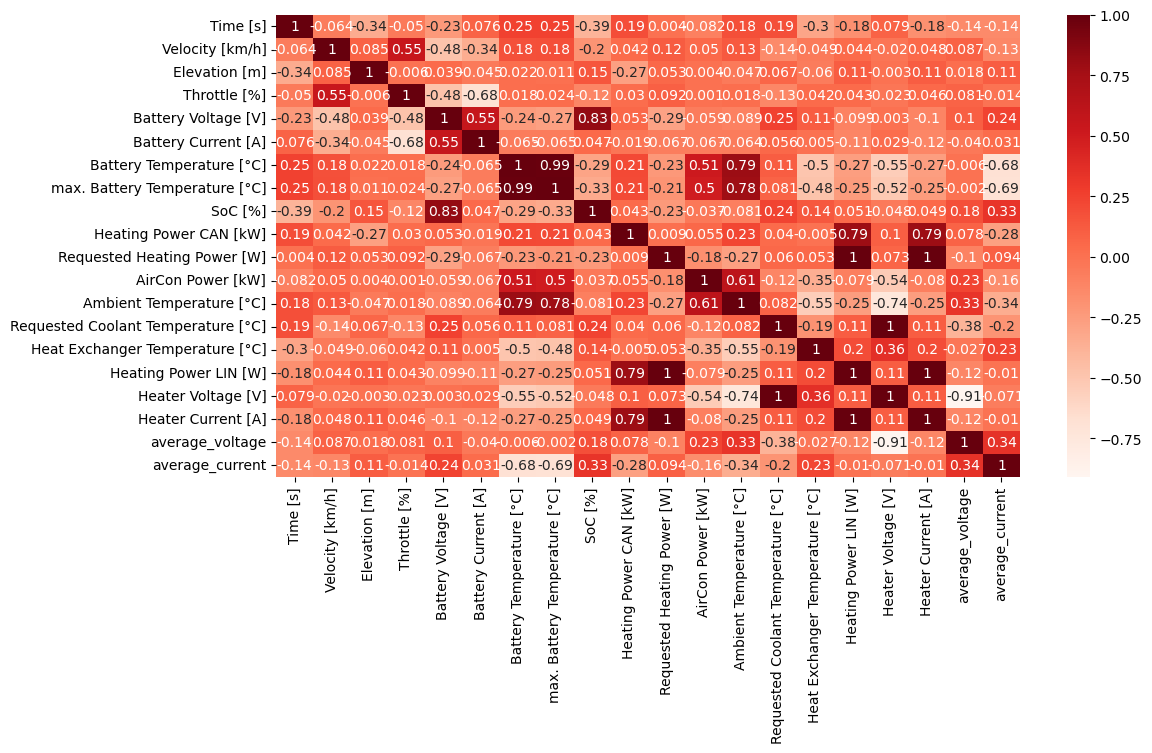

In [17]:
plt.figure(figsize = (12,6))
sns.heatmap(df_A[['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]','Heating Power CAN [kW]',
       'Requested Heating Power [W]', 'AirCon Power [kW]',
       'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]',
       'Heat Exchanger Temperature [°C]', 'Heating Power LIN [W]', 'Heater Voltage [V]', 'Heater Current [A]','average_voltage','average_current']].corr().round(3), cmap='Reds', annot=True)

In [18]:
# selcted 5 features by using heatmap and corelation matrix and using them for model building
df_A = df_A[['Battery Voltage [V]','Battery Current [A]','Battery Temperature [°C]','average_voltage','average_current','SoC [%]']]
#df_A['Battery_Health']=99
df_A

,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],average_voltage,average_current,SoC [%]
0,391.4,-2.20,21.0,391.400000,-2.200000,86.9
1,391.4,-2.21,21.0,391.400000,-2.205000,86.9
2,391.4,-2.26,21.0,391.400000,-2.223333,86.9
3,391.4,-2.30,21.0,391.400000,-2.242500,86.9
4,391.4,-2.30,21.0,391.400000,-2.254000,86.9
...,...,...,...,...,...,...
467696,376.4,-2.44,26.0,382.859093,-15.407312,59.5
467697,376.4,-2.41,26.0,382.859079,-15.407284,59.5
467698,376.4,-2.46,26.0,382.859065,-15.407256,59.5
467699,376.4,-2.49,26.0,382.859051,-15.407229,59.5


In [19]:
import pandas as pd
import numpy as np


In [20]:
# splitting train and test data
from sklearn.model_selection import train_test_split

data = df_A
X = data[['Battery Voltage [V]','Battery Current [A]','Battery Temperature [°C]','average_voltage','average_current']]
y = data['SoC [%]']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Linear Regression

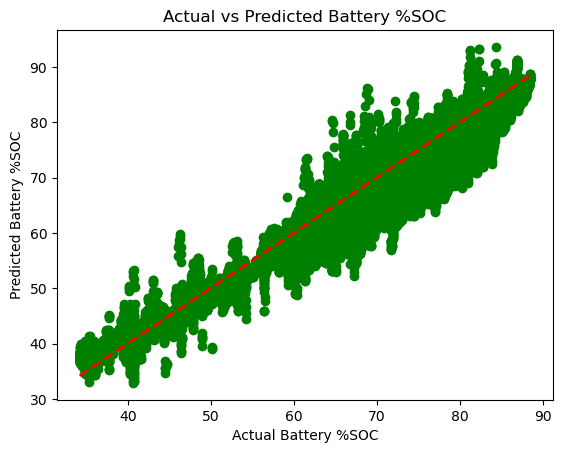

Mean Squared Error: 6.830451584987698
R-squared (R2) Score: 0.9347422120280446


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr= LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)


mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
plt.scatter(Y_test, Y_pred,color='g')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Battery %SOC')
plt.ylabel('Predicted Battery %SOC')
plt.title('Actual vs Predicted Battery %SOC')
plt.show()


print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

## Feed Forward Neural Network

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
model = keras.Sequential()

# Add an input layer with 3 neurons
model.add(layers.Input(shape=(5,)))

# Add one or more hidden layers with ReLU activation
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))

# Add the output layer with a single neuron (for regression)
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
X = data[['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]','average_voltage','average_current']]
y = data['SoC [%]']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# X_train and y_train are training data

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Save the trained model using the TensorFlow SavedModel format
model.save('saved_model5/battery_soc_prediction_model')  # SavedModel directory

from google.colab import files
import os
import shutil

# Define the directory where the model is saved
model_dir = 'saved_model5/battery_soc_prediction_model'

# Check if the model directory exists
if os.path.exists(model_dir):
    # Create a zip file for the directory to make the download easier
    shutil.make_archive(model_dir, 'zip', model_dir)

    # Download the zipped model
    files.download(model_dir + '.zip')
else:
    print("Model directory not found. Please check the path and try again.")


Epoch 1/100
8770/8770 [==============================] - 31s 4ms/step - loss: 9.1951 - mae: 2.3312 - val_loss: 6.9833 - val_mae: 1.9848
Epoch 2/100
8770/8770 [==============================] - 32s 4ms/step - loss: 8.0333 - mae: 2.1724 - val_loss: 7.4652 - val_mae: 2.1203
Epoch 3/100
8770/8770 [==============================] - 29s 3ms/step - loss: 7.4656 - mae: 2.0824 - val_loss: 8.7727 - val_mae: 2.4366
Epoch 4/100
8770/8770 [==============================] - 30s 3ms/step - loss: 6.6687 - mae: 1.9554 - val_loss: 6.2763 - val_mae: 1.9884
Epoch 5/100
8770/8770 [==============================] - 30s 3ms/step - loss: 6.0583 - mae: 1.8559 - val_loss: 6.0769 - val_mae: 1.8291
Epoch 6/100
8770/8770 [==============================] - 29s 3ms/step - loss: 5.6468 - mae: 1.7728 - val_loss: 7.6037 - val_mae: 2.2749
Epoch 7/100
8770/8770 [==============================] - 29s 3ms/step - loss: 5.4699 - mae: 1.7373 - val_loss: 4.7976 - val_mae: 1.6272
Epoch 8/100
8770/8770 [=========================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3654/3654 [==============================] - 6s 2ms/step - loss: 5.1926 - mae: 1.6842
Test Loss: 5.192567825317383, Test MAE: 1.6842204332351685


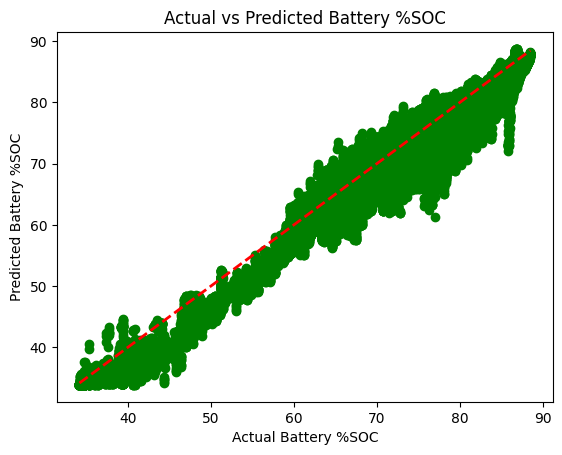

In [63]:
y_pred = model.predict(X_test)
# X_test and y_test are testing data
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")
plt.scatter(y_test, y_pred,color='g')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Battery %SOC')
plt.ylabel('Predicted Battery %SOC')
plt.title('Actual vs Predicted Battery %SOC')
plt.show()


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras import layers

# Load data
try:
    df = df_A
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")
    exit(1)

# Check for expected columns
expected_columns = ['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]','average_voltage','average_current', 'SoC [%]']
if not all(col in df.columns for col in expected_columns):
    print("The required columns are missing in the Excel file.")
    exit(1)

# Prepare features and target
X = df[['Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]','average_voltage','average_current']]
y = df[['SoC [%]']]

# Check for sufficient data
if len(X) < 10:
    print("Insufficient data for training. You need at least 10 samples.")
    exit(1)

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Build the neural network model
model_1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(5,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

model_1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_1.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

# Save the trained model using the TensorFlow SavedModel format
#model_1.save('saved_model5/battery_soc_prediction_model')  # SavedModel directory

#from google.colab import files
#import os
#import shutil

# Define the directory where the model is saved
#model_dir = 'saved_model5/battery_soc_prediction_model'

# Check if the model directory exists
#if os.path.exists(model_dir):
    # Create a zip file for the directory to make the download easier
    #shutil.make_archive(model_dir, 'zip', model_dir)

    # Download the zipped model
    #files.download(model_dir + '.zip')
#else:
    #print("Model directory not found. Please check the path and try again.")





Epoch 1/100
11693/11693 - 12s - loss: 67.8948 - 12s/epoch - 1ms/step
Epoch 2/100
11693/11693 - 11s - loss: 4.9105 - 11s/epoch - 981us/step
Epoch 3/100
11693/11693 - 11s - loss: 4.6171 - 11s/epoch - 974us/step
Epoch 4/100
11693/11693 - 11s - loss: 4.4881 - 11s/epoch - 976us/step
Epoch 5/100
11693/11693 - 11s - loss: 4.4307 - 11s/epoch - 981us/step
Epoch 6/100
11693/11693 - 11s - loss: 4.3611 - 11s/epoch - 978us/step
Epoch 7/100
11693/11693 - 11s - loss: 4.2572 - 11s/epoch - 983us/step
Epoch 8/100
11693/11693 - 11s - loss: 4.1202 - 11s/epoch - 975us/step
Epoch 9/100
11693/11693 - 11s - loss: 4.0136 - 11s/epoch - 980us/step
Epoch 10/100
11693/11693 - 12s - loss: 3.9359 - 12s/epoch - 987us/step
Epoch 11/100
11693/11693 - 12s - loss: 3.8729 - 12s/epoch - 987us/step
Epoch 12/100
11693/11693 - 11s - loss: 3.7836 - 11s/epoch - 983us/step
Epoch 13/100
11693/11693 - 11s - loss: 3.6777 - 11s/epoch - 982us/step
Epoch 14/100
11693/11693 - 11s - loss: 3.5670 - 11s/epoch - 983us/step
Epoch 15/100
116

2924/2924 [==============================] - 3s 886us/step
Mean Squared Error (MSE): 0.9405575045482621


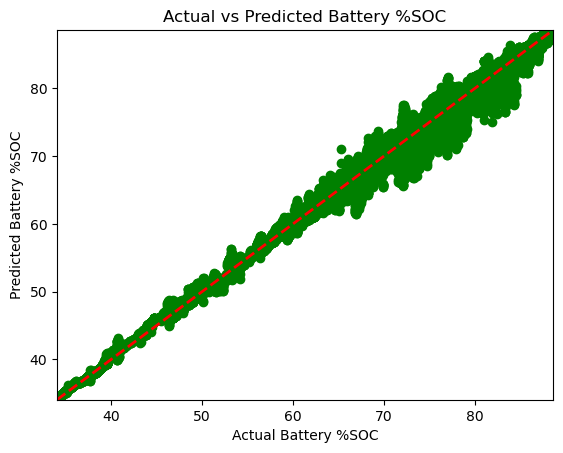

In [28]:
# Make predictions on the test set
y_pred = model_1.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Visualize the predictions
plt.scatter(y_test, y_pred,color='g')
min_val = np.nanmin(np.concatenate([y_test, y_pred]))
max_val = np.nanmax(np.concatenate([y_test, y_pred]))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=2)
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Battery %SOC')
plt.ylabel('Predicted Battery %SOC')
plt.title('Actual vs Predicted Battery %SOC')
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.show()